## Import and Install dependencies

In [ ]:
import torchvision
from google.colab.patches import cv2_imshow

In [ ]:
import numpy as np
import pandas as pd
import os
import random
from PIL import Image, ImageDraw
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torchvision
from torchvision import transforms as T
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.io import read_image, ImageReadMode

In [ ]:
!pip install fiftyone
!pip install fiftyone-db-ubuntu2204

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 12.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py

--2023-11-30 04:09:37--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23628 (23K) [text/plain]
Saving to: ‘transforms.py’

transforms.py       100%[===================>]  23.07K  --.-KB/s    in 0.002s  

2023-11-30 04:09:37 (14.4 MB/s) - ‘transforms.py’ saved [23628/23628]

--2023-11-30 04:09:37--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4063 (4.0K)

# Import Dataset

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

# Load the COCO-2017 dataset
# This will download it from the FiftyOne Dataset Zoo if necessary
dataset = foz.load_zoo_dataset("coco-2017", split="train", label_types=["detections"], classes=["person"], max_samples=1000, seed=43)
dataset_test = foz.load_zoo_dataset("coco-2017", split="validation", label_types=["detections"], classes=["person"], max_samples=100, seed=43)

# Print summary information about the view
print(dataset)

Migrating database to v0.22.3


INFO:fiftyone.migrations.runner:Migrating database to v0.22.3


INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [2.7s elapsed, 0s remaining, 837.1Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [2.7s elapsed, 0s remaining, 837.1Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 1000 images


 100% |████████████████| 1000/1000 [2.1m elapsed, 0s remaining, 8.4 images/s]      


INFO:eta.core.utils: 100% |████████████████| 1000/1000 [2.1m elapsed, 0s remaining, 8.4 images/s]      


Writing annotations for 1000 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 1000 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |███████████████| 1000/1000 [8.1s elapsed, 0s remaining, 97.4 samples/s]       


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [8.1s elapsed, 0s remaining, 97.4 samples/s]       


Dataset 'coco-2017-train-1000' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-1000' created


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading 100 images


 100% |██████████████████| 100/100 [12.7s elapsed, 0s remaining, 7.1 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 100/100 [12.7s elapsed, 0s remaining, 7.1 images/s]      


Writing annotations for 100 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 100 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 100/100 [1.1s elapsed, 0s remaining, 90.3 samples/s]         


INFO:eta.core.utils: 100% |█████████████████| 100/100 [1.1s elapsed, 0s remaining, 90.3 samples/s]         


Dataset 'coco-2017-validation-100' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation-100' created


Name:        coco-2017-train-1000
Media type:  image
Num samples: 1000
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [ ]:
# Choose a random subset of 20 samples to add predictions to
dataset_view = dataset.take(20, seed=43)
session = fo.launch_app(dataset_view)

In [ ]:
# Iterate over the dataset
for sample in dataset:
    # Get the detections
    detections = sample.ground_truth.detections
    # Filter out non-person detections
    detections = [d for d in detections if d.label == "person"]
    # Update the detections
    sample.ground_truth.detections = detections
    # Save the sample
    sample.save()

In [ ]:
# Iterate over the dataset_test
for sample in dataset_test:
    # Get the detections
    detections = sample.ground_truth.detections
    # Filter out non-person detections
    detections = [d for d in detections if d.label == "person"]
    # Update the detections
    sample.ground_truth.detections = detections
    # Save the sample
    sample.save()

In [ ]:
view = dataset.view()
sample = view.take(1).first()
sample

<SampleView: {
    'id': '65680bba4ad3c075abdc420b',
    'media_type': 'image',
    'filepath': '/root/fiftyone/coco-2017/train/data/000000006664.jpg',
    'tags': ['train'],
    'metadata': <ImageMetadata: {
        'size_bytes': None,
        'mime_type': None,
        'width': 475,
        'height': 500,
        'num_channels': None,
    }>,
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '65680bba4ad3c075abdc41c1',
                'attributes': {},
                'tags': [],
                'label': 'person',
                'bounding_box': [0.04494736842105263, 0.02262, 0.8562947368421053, 0.9618],
                'mask': None,
                'confidence': None,
                'index': None,
                'supercategory': 'person',
                'iscrowd': 0,
            }>,
        ],
    }>,
}>

In [ ]:
width = sample.metadata.width
height = sample.metadata.height
bbox = sample.ground_truth.detections[0].bounding_box
x1, y1, x2, y2 = bbox
x1 * width, y1 * height, x2 * width, y2 * height

(256.84, 70.89, 97.07, 232.95)

In [ ]:
for i in (sample.ground_truth.detections):
  print(i.label, i.bounding_box)

person [0.5136799999999999, 0.21288288288288287, 0.19413999999999998, 0.6995495495495495]
person [0.17472, 0.554084084084084, 0.30760000000000004, 0.42150150150150156]
person [0.17414, 0.21453453453453453, 0.13306, 0.2074174174174174]
person [0.33864, 0.22348348348348349, 0.10526, 0.17084084084084084]
person [0.77426, 0.1805105105105105, 0.17628, 0.16051051051051052]
person [0.43101999999999996, 0.22921921921921923, 0.0943, 0.16180180180180181]
person [0.07931999999999999, 0.0, 0.07334, 0.042702702702702704]
person [0.0351, 0.29114114114114115, 0.10164, 0.1569069069069069]
person [0.09820000000000001, 0.24282282282282283, 0.10636, 0.18852852852852853]
person [0.03338, 0.426006006006006, 0.22003999999999999, 0.5467267267267267]


In [ ]:
# Classes list
classes = dataset.distinct("ground_truth.detections.label")

# The directory in which the dataset's images are stored
IMAGES_DIR = os.path.dirname(dataset.first().filepath)

# Export some labels in COCO format
dataset.take(100).export(
    dataset_type=fo.types.COCODetectionDataset,
    label_field="ground_truth",
    labels_path="coco.json",
    classes=classes,
)

 100% |█████████████████| 100/100 [312.2ms elapsed, 0s remaining, 320.3 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 100/100 [312.2ms elapsed, 0s remaining, 320.3 samples/s]      


In [ ]:
#sample = view['/root/fiftyone/coco-2017/train/data/000000010239.jpg']

In [ ]:
width = sample.metadata.width
height = sample.metadata.height
bbox = sample.ground_truth.detections[0].bounding_box
x1, y1, x2, y2 = bbox
x1, y1, x2, y2

(0.04494736842105263, 0.02262, 0.8562947368421053, 0.9618)

In [ ]:
x1 *  width, y1 * height, x2 * width, y2 * height

(21.35, 11.31, 406.74, 480.9)

In [ ]:
x2 * width * y2 * height

195601.266

## dataset augmentasi

In [ ]:
transform = T.Compose([
    T.ToPILImage(),
    #T.CenterCrop(10),
    T.ToTensor(),
    T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transforms, root):
        self.dataset = dataset
        self.transforms = transforms
        self.root = root
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "data"))))

    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.root, "data", self.imgs[idx])
        img = read_image(img_path, mode=ImageReadMode.RGB )

        view = self.dataset.view()
        sample = view[img_path]

        # get bounding box coordinates for each detection
        width = sample.metadata.width
        height = sample.metadata.height
        boxes = []
        for d in sample.ground_truth.detections:
            x,y,w,h = d.bounding_box
            x1 = x * width
            y1 = y * height
            x2 = x1 + (w * width)
            y2 = y1 + (h * height)
            boxes.append([x1, y1, x2, y2])

        boxes = torch.tensor(boxes);

        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        num_objs = len(sample.ground_truth.detections)

        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)

        image_id = idx
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        # Wrap sample and targets into torchvision tv_tensors:
        # img = tv_tensors.Image(img)

        target = {}
        target["boxes"] = boxes
        # target["masks"] = None
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img = self.transforms(img)

        return (img, target)

    def __len__(self):
        return len(self.imgs)

In [ ]:
from torch.utils.data import DataLoader
import utils


train_data_dir = '/root/fiftyone/coco-2017/train'
test_data_dir = '/root/fiftyone/coco-2017/validation'

train_dataset = CustomDataset(root=train_data_dir, dataset=dataset, transforms=transform)
test_dataset = CustomDataset(root=test_data_dir, dataset=dataset_test, transforms=transform)
# train_dataset = ObjectDataset(dataset, transforms=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=utils.collate_fn)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=utils.collate_fn)

In [ ]:
import matplotlib.pyplot as plt

images, targets = next(iter(train_loader))
image = images[0]
target = targets[0]
image, target

(tensor([[[-0.2235,  0.1216, -0.7882,  ..., -0.0431, -0.1686, -0.0510],
          [-0.1216, -0.0118, -0.2235,  ..., -0.0196, -0.0902,  0.0275],
          [-0.1137,  0.5922, -0.0667,  ..., -0.0745,  0.3412, -0.0118],
          ...,
          [-0.5373, -0.4667, -0.3882,  ..., -0.2471, -0.1843, -0.2078],
          [-0.3412, -0.3569, -0.4039,  ..., -0.2549, -0.1529, -0.1529],
          [-0.4196, -0.4039, -0.4510,  ..., -0.3098, -0.2549, -0.2706]],
 
         [[-0.1294,  0.2392, -0.6941,  ..., -0.0118, -0.1137, -0.1451],
          [ 0.0275,  0.1451, -0.0824,  ..., -0.0039, -0.2078,  0.0196],
          [ 0.0824,  0.7804,  0.0667,  ..., -0.2000,  0.2235, -0.1294],
          ...,
          [-0.4588, -0.3882, -0.3255,  ..., -0.1765, -0.1216, -0.1451],
          [-0.2314, -0.2471, -0.2863,  ..., -0.1608, -0.0824, -0.0902],
          [-0.2863, -0.2627, -0.3098,  ..., -0.2157, -0.1608, -0.2000]],
 
         [[ 0.0745,  0.3882, -0.6000,  ...,  0.0745, -0.0510, -0.0667],
          [ 0.2627,  0.3333,

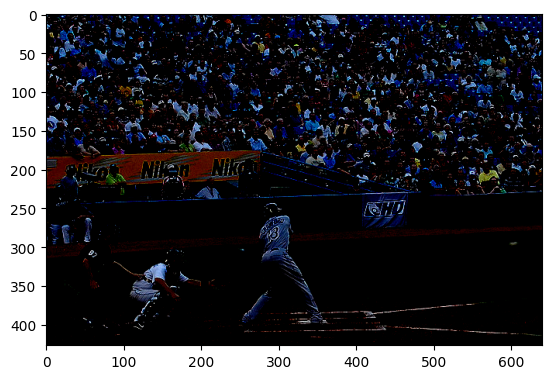

In [ ]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(image.permute(1, 2, 0) )

In [ ]:
num = len(target['boxes'])

igg = image.permute(1, 2, 0).numpy().astype(np.uint8).copy()
for i in range(num):
  x1, y1, x2, y2 = np.array(target['boxes'][i]).astype("int")
  print(x1,y1,x2,y2)
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (255, 0, 0), 1)

253 243 366 404
107 301 237 412
25 269 127 412
76 191 105 236
247 185 276 235
193 209 223 237
148 193 180 235
0 221 33 299
544 211 566 232
20 237 63 296
174 213 193 238
18 194 44 240
512 203 528 232
0 0 639 347


In [ ]:
type(target['boxes'][i])

torch.Tensor

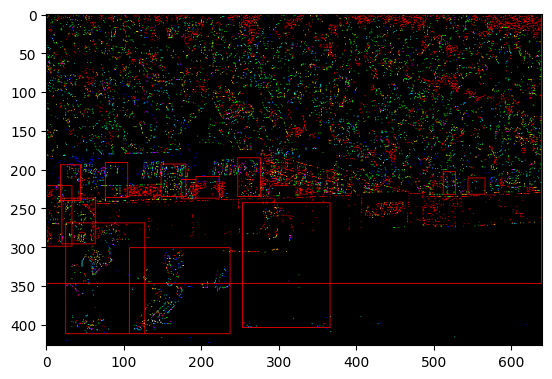

In [ ]:
plt.imshow(igg)

# Modeling and Finetuning from a pretrained model

In [ ]:
# model 2, kita coba ini
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# load a model pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

# replace the classifier with a new one, that has
# num_classes which is user-defined
num_classes = 2  # 1 class (person) + background
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features
# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:03<00:00, 47.6MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

# Training Model

In [ ]:
from engine import train_one_epoch, evaluate
#device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
#model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=0.001,
    momentum=0.9,
    weight_decay=0.0001
)

# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,
    gamma=0.1
)

num_epochs = 3

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, test_loader, device=device)

print("That's it!")

Epoch: [0]  [  0/250]  eta: 0:40:39  lr: 0.000005  loss: 1.2877 (1.2877)  loss_classifier: 0.5850 (0.5850)  loss_box_reg: 0.3051 (0.3051)  loss_objectness: 0.3265 (0.3265)  loss_rpn_box_reg: 0.0711 (0.0711)  time: 9.7589  data: 0.0549  max mem: 5971
Epoch: [0]  [ 10/250]  eta: 0:08:09  lr: 0.000045  loss: 1.0625 (1.0405)  loss_classifier: 0.5737 (0.5450)  loss_box_reg: 0.2634 (0.2917)  loss_objectness: 0.1043 (0.1570)  loss_rpn_box_reg: 0.0282 (0.0468)  time: 2.0399  data: 0.0496  max mem: 6790
Epoch: [0]  [ 20/250]  eta: 0:06:31  lr: 0.000085  loss: 0.8193 (0.8628)  loss_classifier: 0.4066 (0.4356)  loss_box_reg: 0.2552 (0.2868)  loss_objectness: 0.0530 (0.1046)  loss_rpn_box_reg: 0.0251 (0.0358)  time: 1.2989  data: 0.0506  max mem: 6790
Epoch: [0]  [ 30/250]  eta: 0:05:46  lr: 0.000125  loss: 0.7376 (0.8633)  loss_classifier: 0.2954 (0.3891)  loss_box_reg: 0.3128 (0.3082)  loss_objectness: 0.0440 (0.1172)  loss_rpn_box_reg: 0.0285 (0.0488)  time: 1.3196  data: 0.0502  max mem: 7460


In [ ]:
evaluate(model, test_loader, device=device)

creating index...
index created!
Test:  [ 0/25]  eta: 0:00:14  model_time: 0.5239 (0.5239)  evaluator_time: 0.0076 (0.0076)  time: 0.5734  data: 0.0381  max mem: 8200
Test:  [24/25]  eta: 0:00:00  model_time: 0.6023 (0.6111)  evaluator_time: 0.0168 (0.0186)  time: 0.6734  data: 0.0492  max mem: 8200
Test: Total time: 0:00:17 (0.6805 s / it)
Averaged stats: model_time: 0.6023 (0.6111)  evaluator_time: 0.0168 (0.0186)
Accumulating evaluation results...
DONE (t=0.03s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.404
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.710
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.394
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.221
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.429
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.514
 Average Recall     (AR) @[ IoU=

In [ ]:
# save model to drive
torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/fastrcnn_model_1000.pt')


# Testing Model

In [ ]:
transform1 = T.Compose([
    T.ToTensor(),
])

In [ ]:
ig = Image.open("/root/fiftyone/coco-2017/train/data/000000000790.jpg")
img = transform1(ig).to('cuda')

In [ ]:
with torch.no_grad():
  pred = model([img])

In [ ]:
pred

[{'boxes': tensor([[ 11.8438, 112.3363, 194.7720, 395.6578],
          [448.1035, 133.3428, 626.8076, 390.1340],
          [332.5020,  97.6608, 476.2269, 279.0543],
          [206.8850,  77.5846, 309.1078, 196.5962],
          [  0.0000, 146.6918,  33.7981, 260.6331],
          [509.0685, 345.8047, 608.1297, 422.0000],
          [297.9779,  74.1654, 492.5099, 354.5423],
          [ 30.4538,  71.2067, 399.5797, 421.3631],
          [102.4045, 115.2036, 186.8980, 231.6227],
          [197.2240,  89.4741, 320.9626, 268.4785],
          [425.8174,  88.1611, 459.3050, 145.8098],
          [263.5557,   4.7791, 355.3780, 197.7757],
          [326.9290, 126.8220, 561.0238, 395.1720],
          [ 64.7714, 113.8079, 196.9851, 271.0048],
          [303.3788, 162.2912, 320.1389, 197.0258],
          [ 19.6767,   0.7781,  99.8845,  42.5556]], device='cuda:0'),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'),
  'scores': tensor([0.9957, 0.9927, 0.9877, 0.9854, 0

In [ ]:
bboxes, label, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [ ]:
num = torch.argwhere(scores > 0.6).shape[0]

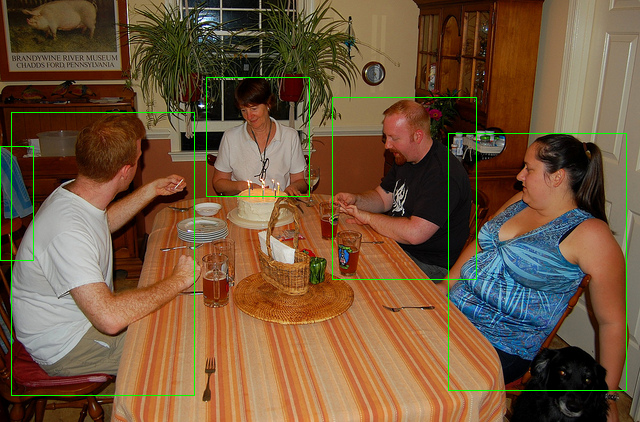

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
igg = cv2.imread("/root/fiftyone/coco-2017/train/data/000000000790.jpg")
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].to('cpu').numpy().astype("int")
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 1)

cv2_imshow(igg)

In [ ]:
ig = Image.open("/root/fiftyone/coco-2017/train/data/000000005260.jpg")
img = transform1(ig).to('cuda')
with torch.no_grad():
  pred = model([img])
pred

[{'boxes': tensor([[ 83.5029, 136.5416, 175.4305, 320.8145],
          [394.3932, 160.0345, 467.8341, 329.3214],
          [325.7183, 120.4982, 403.3187, 282.6661],
          [268.7044, 138.3232, 314.1247, 274.0270],
          [573.2787, 168.6201, 614.3105, 280.5941],
          [196.2194, 217.8874, 278.1807, 326.5868],
          [ 47.2634, 135.6089,  99.8419, 254.2492],
          [196.3188, 132.7401, 248.2200, 229.4763],
          [537.8157, 159.2199, 567.4357, 211.6375],
          [ 10.1813, 144.1103,  26.5175, 259.8933],
          [173.5473, 141.7980, 202.8917, 226.9751],
          [ 86.8481, 193.3256, 106.7153, 248.2827],
          [ 43.0950, 139.4611,  70.3345, 201.4747],
          [172.4513, 131.3624, 232.1268, 225.1362],
          [190.9994, 152.2411, 268.7351, 308.7321],
          [ 96.9884, 140.1033, 240.7897, 321.3828],
          [329.6494, 119.4462, 463.2428, 310.8666],
          [ 41.6759, 137.3139,  76.2891, 251.6572],
          [301.8871, 142.6488, 319.2590, 237.1286],
   

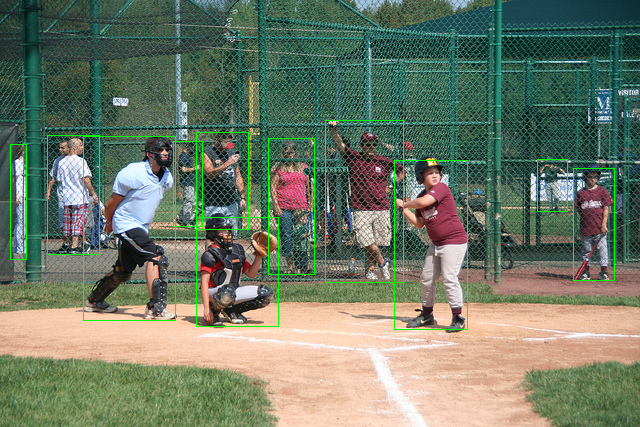

In [ ]:
bboxes, label, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]
num = torch.argwhere(scores > 0.6).shape[0]
igg = cv2.imread("/root/fiftyone/coco-2017/train/data/000000005260.jpg")
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].to('cpu').numpy().astype("int")
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 1)
cv2_imshow(igg)

# Evaluating model

In [ ]:
print(dataset)
print(dataset_test)

Name:        coco-2017-train-1000
Media type:  image
Num samples: 1000
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
Name:        coco-2017-validation-100
Media type:  image
Num samples: 100
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detecti

In [ ]:
# Print a ground truth detection
sample = dataset_test.first()
print(sample.ground_truth.detections[1])

In [ ]:
# Choose a random subset of 20 samples to add predictions to
predictions_view = dataset_test.take(60, seed=51)

In [ ]:
from PIL import Image
from torchvision.transforms import functional as func

import fiftyone as fo

# Get class list
classes = dataset.default_classes

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |███████████████████| 60/60 [8.3s elapsed, 0s remaining, 7.5 samples/s]       


INFO:eta.core.utils: 100% |███████████████████| 60/60 [8.3s elapsed, 0s remaining, 7.5 samples/s]       


Finished adding predictions


In [ ]:
session = fo.launch_app(dataset_test)
session.view = predictions_view

In [ ]:
# Use the view bar to create an `Exists(faster_rcnn, True)` stage
# Now your view contains only the 100 samples with predictions in `faster_rcnn` field
session.show()

In [ ]:
from fiftyone import ViewField as F

# Only contains detections with confidence >= 0.75
high_conf_view = predictions_view.filter_labels("faster_rcnn", (F("confidence") > 0.75) & (F("label").is_in(("person"))), only_matches=True)

In [ ]:
# Print some information about the view
print(high_conf_view)

Dataset:     coco-2017-validation-100
Media type:  image
Num samples: 59
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:      fiftyone.core.fields.IntField
    eval_fp:      fiftyone.core.fields.IntField
    eval_fn:      fiftyone.core.fields.IntField
View stages:
    1. Take(size=60, seed=51)
    2. FilterLabels(field='faster_rcnn', filter={'$and': [{...}, {...}]}, only_matches=True, trajectories=False)


In [ ]:
# Load high confidence view in the App
session.view = high_conf_view

In [ ]:
# Evaluate the predictions in the `faster_rcnn` field of our `high_conf_view`
# with respect to the objects in the `ground_truth` field
results = high_conf_view.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,

)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████████| 59/59 [1.4s elapsed, 0s remaining, 49.1 samples/s]         


INFO:eta.core.utils: 100% |███████████████████| 59/59 [1.4s elapsed, 0s remaining, 49.1 samples/s]         


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████████| 59/59 [747.6ms elapsed, 0s remaining, 78.9 samples/s]      


INFO:eta.core.utils: 100% |███████████████████| 59/59 [747.6ms elapsed, 0s remaining, 78.9 samples/s]      


In [ ]:
# Get the 10 most common classes in the dataset
counts = dataset_test.count_values("faster_rcnn.detections.label")
classes_top10 = sorted(counts, key=counts.get, reverse=True)[:10]

# Print a classification report for the top-10 classes
results.print_report(classes=classes_top10)

              precision    recall  f1-score   support

      person       0.88      0.77      0.82       326

   micro avg       0.88      0.77      0.82       326
   macro avg       0.88      0.77      0.82       326
weighted avg       0.88      0.77      0.82       326



In [ ]:
print(results.mAP())

0.4293408500707328


In [ ]:
plot = results.plot_pr_curves(classes=["person"])
plot.show()